In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy.io
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neural_network import MLPClassifier

In [2]:
mat = scipy.io.loadmat('../../datasets/mnist.mat')

X_train = mat['Xtr']
y_train = mat['ytr'].ravel()
X_test = mat['Xtst']
y_test = mat['ytst'].ravel()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [3]:
MLPClassifier?

Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden laye

Iteration 1, loss = 0.45043877
Iteration 2, loss = 0.20395786
Iteration 3, loss = 0.15804766
Iteration 4, loss = 0.13024068
Iteration 5, loss = 0.11255256
Iteration 6, loss = 0.09925185
Iteration 7, loss = 0.08817264
Iteration 8, loss = 0.08006501
Iteration 9, loss = 0.07308416
Iteration 10, loss = 0.06775443
Iteration 11, loss = 0.06235847
Iteration 12, loss = 0.05837361
Iteration 13, loss = 0.05451112
Iteration 14, loss = 0.05121086
Iteration 15, loss = 0.04843035
Iteration 16, loss = 0.04519011
Iteration 17, loss = 0.04281563
Iteration 18, loss = 0.04048305
Iteration 19, loss = 0.03825933
Iteration 20, loss = 0.03597190


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.992733
Test set score: 0.971300


Text(0, 0.5, 'loss')

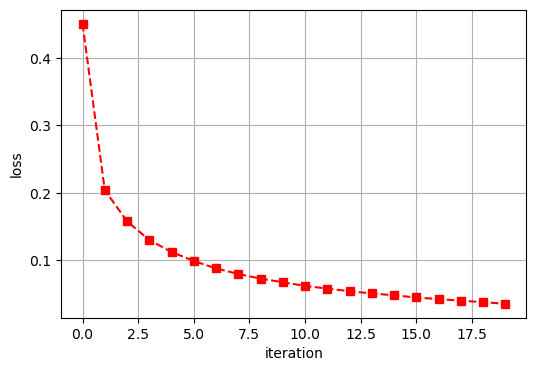

In [4]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50),
    activation='logistic',
    max_iter=20,
    alpha=1e-4,
    solver="sgd",
    batch_size=200,
    verbose=1,
    random_state=1,
    learning_rate_init=0.2,
)

mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_, 'r--s')
plt.grid('on')
plt.xlabel('iteration')
plt.ylabel('loss')

In [5]:
y_test[0], mlp.predict_proba(X_test[:1])

(7,
 array([[2.34481315e-07, 1.58579818e-05, 5.19650275e-06, 5.59230013e-04,
         2.74937338e-07, 3.36019576e-06, 6.52942659e-12, 9.98959074e-01,
         7.74765751e-07, 4.55996790e-04]]))

In [7]:
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore")

# Perform k-fold cross-validation
mlp.verbose = 0
scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Evaluate the model on the test set
test_score = mlp.score(X_test, y_test)
print("Test score:", test_score)

Cross-validation scores: [0.97191667 0.96908333 0.96916667 0.96625    0.97075   ]
Mean cross-validation score: 0.9694333333333333
Test score: 0.9713
